In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

from src.utils import load_images, down_sample, interpolate_rgb

## Load images

In [2]:
# Load ground truths.
ims_gt = load_images()
ims_gt.shape

(15, 1024, 1024, 3)

## Downsample to line scan

In [3]:
ims_ds = []
for im in ims_gt:
    im_ds, mask = down_sample(im, is_torch=False)
    ims_ds.append(im_ds)
ims_ds = np.array(ims_ds)

In [4]:
mask.shape

(1024, 1024, 3)

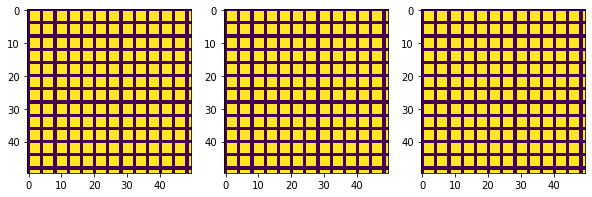

In [5]:
fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(1-mask[:50,:50,0])
axs[1].imshow(1-mask[:50,:50,1])
axs[2].imshow(1-mask[:50,:50,2])
plt.show()

### Interpolate images

In [6]:
mask2d = (1- mask[:,:,0]).astype(np.bool)

In [7]:
im_interpolated = interpolate_rgb(im_ds, mask2d)

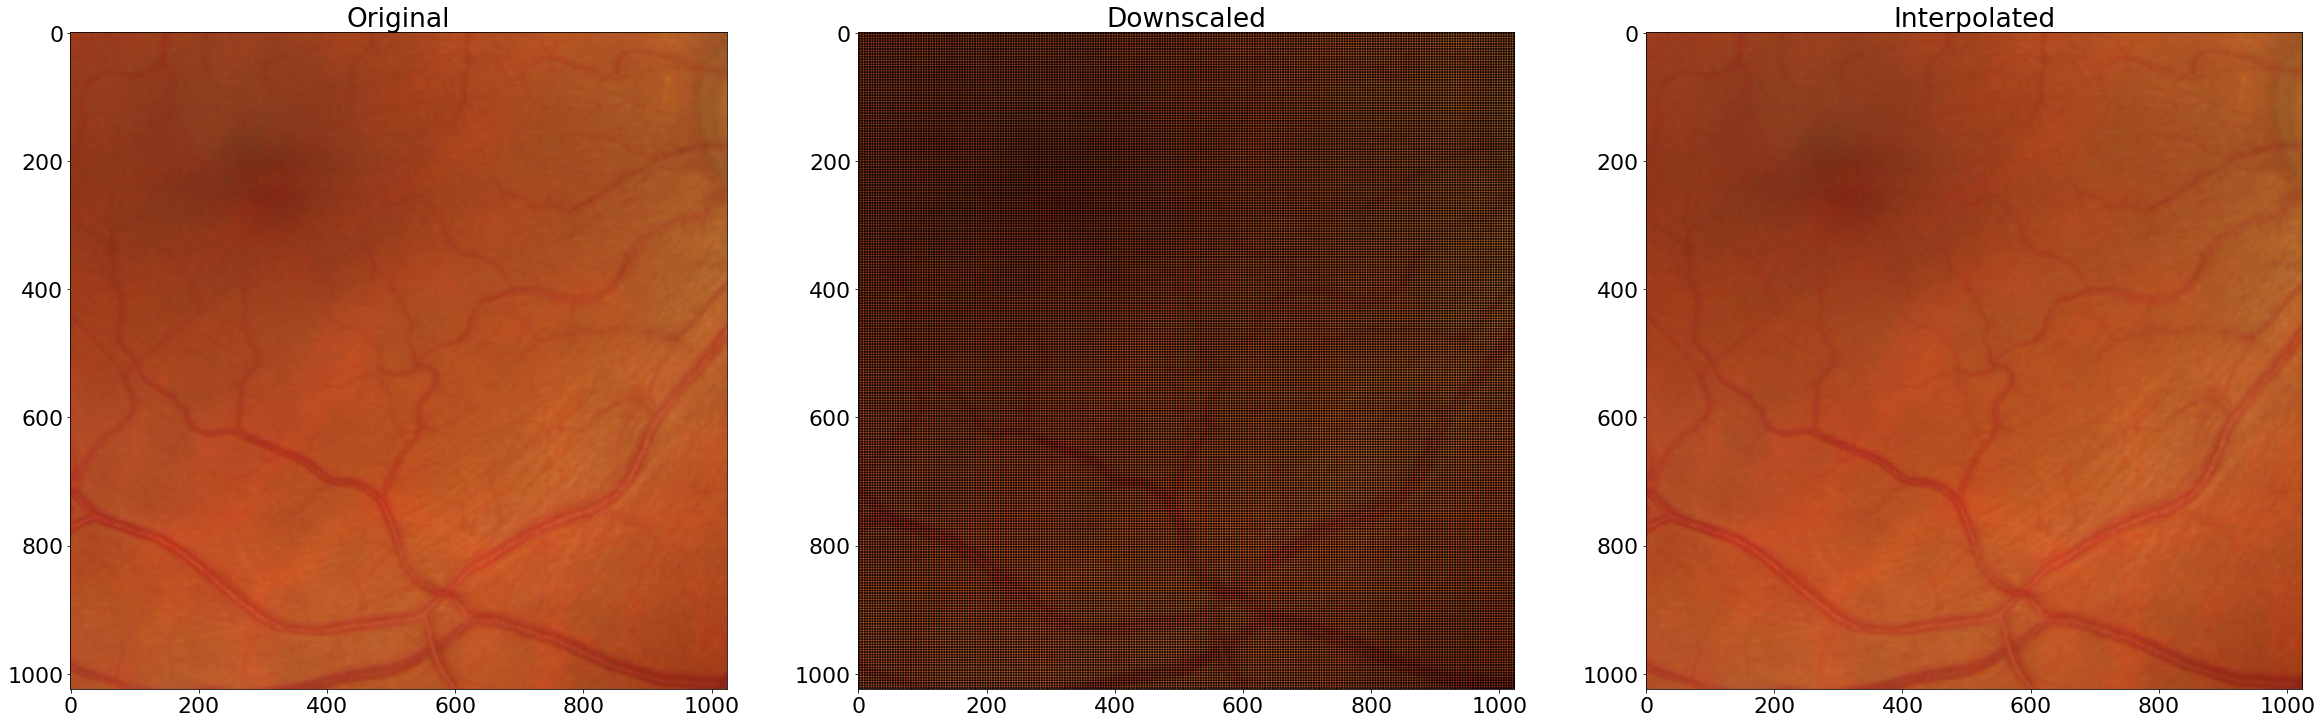

In [16]:
plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 3, figsize=(40, 20))

axes[0].imshow(ims_gt[-1])
axes[0].set_title('Original')
axes[1].imshow(im_ds)
axes[1].set_title('Downscaled')
axes[2].imshow(im_interpolated)
axes[2].set_title('Interpolated')
plt.show()

In [17]:
from skimage.metrics import mean_squared_error
mean_squared_error(ims_gt[0], im_interpolated.astype(np.float32))

0.01378395472416409